<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/0605-maze_a_star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A* para encontrar la salida de un laberinto

Obtenemos algunos archivos para ayudarnos a generar laberintos interesantes

In [ ]:
rawbase = "https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/"

In [ ]:
ds = f"{rawbase}disjointset.py"
mb = f"{rawbase}mazebuilder.py"
!curl -O $ds
!curl -O $mb
!head mazebuilder.py
!sed -i 's/algorithmic_complexity.//g' mazebuilder.py
!head mazebuilder.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   602  100   602    0     0  24080      0 --:--:-- --:--:-- --:--:-- 25083
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1130  100  1130    0     0  45200      0 --:--:-- --:--:-- --:--:-- 45200
import random
import numpy as np

import algorithmic_complexity.disjointset as ds

def makeMaze(rows, cols: int):
    maze = np.zeros((rows*2 + 1, cols*2+1))
    maze[1::2, 1::2] = 1
    maze[ 1][ 0] = 3
    maze[-2][-1] = 3
import random
import numpy as np

import disjointset as ds

def makeMaze(rows, cols: int):
    maze = np.zeros((rows*2 + 1, cols*2+1))
    maze[1::2, 1::2] = 1
    maze[ 1][ 0] = 3
    maze[-2][-1] = 3


Importamos mazebuilder que contiene la función `mazeMaze()`

In [ ]:
import mazebuilder as mb

In [ ]:
maze = mb.makeMaze(3, 4)
print(maze)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 1. 1. 1. 0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1. 0. 1. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


La función crea un punto de entrada y salida. Para experimentar con A* es más interesante si el punto de partida está al centro, de modo que cerramos uno de los puntos.

In [ ]:
maze[1, 0] = 0
print(maze)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 1. 0. 1. 0. 1. 3.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Dibujamos el laberinto como si fuera una imagen con matplotlib

In [ ]:
import matplotlib.pyplot as plt

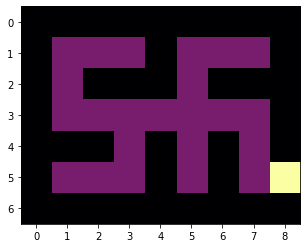

In [ ]:
plt.imshow(maze, cmap="inferno")

Veamos el resultado de usar DFS y BFS

In [ ]:
def dfs(maze, s, t):
    n, m = maze.shape
    
    def _dfs(u):
        if maze[u] == 1:
            maze[u] = 3
            if u == t:
                return True
            i, j = u
            nbs = [(i-1, j), (i, j-1), (i, j+1), (i+1, j)]
            for v in nbs:
                if maze[v] == 1:
                    if _dfs(v):
                        return True
            maze[u] = 2
        return False

    _dfs(s)

Una prueba con un laberinto pequeño, empezando desde la esquina superior izquierda

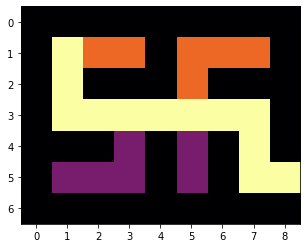

In [ ]:
n, m = maze.shape
maze2 = maze.copy()
dfs(maze2, (1, 1), (n-2, m-2))
plt.imshow(maze2, cmap="inferno")

El camino de color crema es el camino final, el morado son los caminos no recorridos, y el naranja es el camino recorrido pero descartado por ser caminos sin salida.

In [ ]:
import numpy as np

def bfs(maze, s, t):
    n, m = maze.shape
    path = np.full((n, m, 2), -1)
    q = [s]
    maze[s] = 2
    while q:
        u = q.pop(0)
        if u == t:
            break
        i, j = u
        nbs = [(i-1, j), (i, j-1), (i, j+1), (i+1, j)]
        for v in nbs:
            if maze[v] == 1:
                path[v] = u
                maze[v] = 2
                q.append(v)
    
    last = t
    while last != s:
        maze[last] = 3
        last = tuple(path[last])

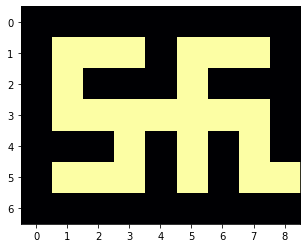

In [ ]:
n, m = maze.shape
maze2 = maze.copy()
bfs(maze2, (1, 1), (n-2, m-2))
plt.imshow(maze2, cmap="inferno")

La principal diferencia entre BFS y DFS es que BFS tiende a recorrer más posibles caminos que DFS, que tiende a recorrer solo la mitad del laberinto.

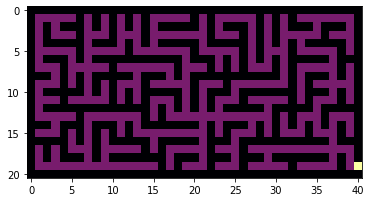

In [ ]:
maze = mb.makeMaze(10, 20)
maze[1, 0] = 0
plt.imshow(maze, cmap="inferno")

Probamos con algo más grande... nótese que el laberinto es aleatorio, por lo que escoger un punto central para iniciar, debe ser recalculado.

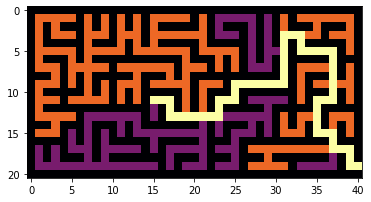

In [ ]:
n, m = maze.shape
copy = maze.copy()
dfs(copy, (11, 15), (n-2, m-2))
plt.imshow(copy, cmap="inferno")

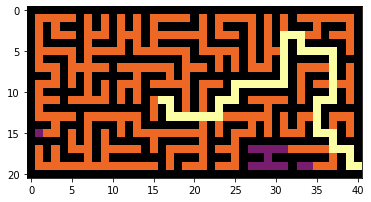

In [ ]:
n, m = maze.shape
copy = maze.copy()
bfs(copy, (11, 15), (n-2, m-2))
plt.imshow(copy, cmap="inferno")

Notamos claramente que ambos algoritmos, hacen un intento de buscar salida por zonas que se alejan de la salida, ambos dirigiéndose hacia la esquina superior izquierda, antes de eventualmente encontrar camino hacia la salida en la parte inferior derecha.

## A*

In [ ]:
import heapq as hq
import numpy as np
import math

def h(a, b):
    # manhattan
    x0, y0 = a
    x1, y1 = b
    return abs(x0 - x1) + abs(y1 - y0)

def a_star(maze, s, t):
    n, m = maze.shape
    g = np.full((n, m), math.inf)
    f = np.full((n, m), math.inf)
    path = np.full((n, m, 2), -1)
    q = []
    g[s] = 0
    f[s] = h(s, t)
    hq.heappush(q, (f[s], s))
    while q:
        _, u = hq.heappop(q)
        if maze[u] != 1:
            continue
        maze[u] = 2
        if u == t:
            break
        i, j = u
        nbs = [(i-1, j), (i, j-1), (i, j+1), (i+1, j)]
        for v in nbs:
            if maze[v] == 1:
                if g[u] + 1 < g[v]:
                    path[v] = u
                    g[v] = g[u] + 1
                    f[v] = g[v] + h(v, t)
                    hq.heappush(q, (f[v], v))
    last = t
    while last != s:
        maze[last] = 3
        last = tuple(path[last])

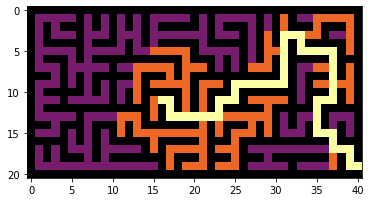

In [ ]:
n, m = maze.shape
copy = maze.copy()
a_star(copy, (11, 15), (n-2, m-2))
plt.imshow(copy, cmap="inferno")